In [1]:
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F

In [2]:
# Transform each image into tensor and normalized with mean and std
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# Define the batch size used each time we go through the dataset
batch_size = 32

# Set the training loader
train_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)
# Set the testing loader
test_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=False, download=True, transform=transform), batch_size=batch_size, shuffle=True)

In [3]:

## Init weights
# 784 because there is 784 pixels in each image
# 10 because there is 10 possible outputs : 0,1,2,3,4,5,6,7,8,9
# Each pixel is linked to 10 outputs where each link is a weight to optimize\
# <=> Each class is linked to 784 pixel where each link is a weight to optimize
weights = torch.randn(784, 10, requires_grad=True)

In [4]:
print(weights)

tensor([[-0.6691, -0.8548,  0.8228,  ..., -0.2059, -0.1670, -1.2352],
        [ 1.5658, -0.3212,  0.9960,  ..., -0.2793, -0.7033,  1.1961],
        [ 0.9765,  0.3999, -0.1186,  ...,  1.3988,  1.2356, -1.1661],
        ...,
        [-0.9946, -0.2594, -2.2248,  ...,  1.0299,  0.8551, -1.0055],
        [ 1.1463, -1.1721, -0.0301,  ...,  0.2446, -0.3601,  0.9401],
        [ 0.1329,  1.4909,  1.1913,  ..., -0.3442,  0.3680, -0.8185]],
       requires_grad=True)


In [5]:
def test(weights, test_loader):
    test_size = len(test_loader.dataset)
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        #print(batch_idx, data.shape, target.shape)
        data = data.view((-1, 28*28))
        #print(batch_idx, data.shape, target.shape)

        outputs = torch.matmul(data, weights)
        softmax = F.softmax(outputs, dim=1)
        pred = softmax.argmax(dim=1, keepdim=True)
        n_correct = pred.eq(target.view_as(pred)).sum().item()
        correct += n_correct

    acc = correct / test_size
    print(" Accuracy on test set", acc)
    return

test(weights, test_loader)

 Accuracy on test set 0.1245


In [10]:
it = 0
for batch_idx, (data, targets) in enumerate(train_loader):
    # Be sure to start the loop with zeros grad
    if weights.grad is not None:
        weights.grad.zero_()
    
    data = data.view((-1, 28*28))
    #print("batch_idx: {}, data.shape: {}, target.shape: {}".format(batch_idx, data.shape, targets.shape))
    outputs = torch.matmul(data, weights)
    #print("outputs.shape: {}".format(outputs.shape))

    log_softmax = F.log_softmax(outputs, dim=1)
    #print("Log softmax: {}".format(log_softmax.shape))

    #print((-log_softmax[0][targets[0]] + -log_softmax[1][targets[1]] )  / 2 )
    #print(-log_softmax[0][targets[0]], targets[0])
    
    loss = F.nll_loss(log_softmax, targets)
    print("\rLoss shape: {}".format(loss), end="")
    
    # Compute the gradients for each variables
    loss.backward()
    
    with torch.no_grad():
        weights -= 0.1*weights.grad
        
    it += 1
    if it % 100 == 0:
        test(weights, test_loader)
        
    if it > 5000:
        break

Loss shape: 1.5049308538436893633 Accuracy on test set 0.8796
Loss shape: 2.596841573715215435 Accuracy on test set 0.8829
Loss shape: 0.12864117324352264 Accuracy on test set 0.8804
Loss shape: 0.9958602190017711085 Accuracy on test set 0.885
Loss shape: 0.24644100666046143 Accuracy on test set 0.885
Loss shape: 0.29127213358879095 Accuracy on test set 0.8821
Loss shape: 0.119110867381095898 Accuracy on test set 0.8871
Loss shape: 1.455289125442504977 Accuracy on test set 0.8868
Loss shape: 0.450816035270690975 Accuracy on test set 0.8859
Loss shape: 0.903244137763977363 Accuracy on test set 0.8789
Loss shape: 0.7782037258148193566 Accuracy on test set 0.875
Loss shape: 1.86000752449035646 Accuracy on test set 0.8822
Loss shape: 0.63238281011581427 Accuracy on test set 0.8829
Loss shape: 1.976414680480957344 Accuracy on test set 0.8821
Loss shape: 0.6345120668411255865 Accuracy on test set 0.8823
Loss shape: 0.06980652362108232 Accuracy on test set 0.8869
Loss shape: 0.897294819355011

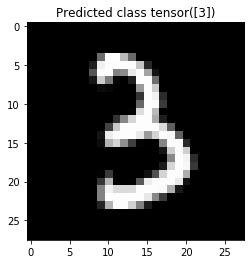

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

batch_idx, (data, target) = next(enumerate(test_loader))
data = data.view((-1, 28*28))

outputs = torch.matmul(data, weights)
softmax = F.softmax(outputs, dim=1)
pred = softmax.argmax(dim=1, keepdim=True)

plt.imshow(data[0].view(28, 28), cmap="gray")
plt.title("Predicted class {}".format(pred[0]))
plt.show()